# Data Exploration

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('KSI.csv')

In [74]:
# rows and columns
print(df.shape)

(18194, 57)


In [75]:
print(df.head())

              X             Y   INDEX_    ACCNUM  YEAR  \
0 -8.844611e+06  5.412414e+06  3387730  892658.0  2006   
1 -8.844611e+06  5.412414e+06  3387731  892658.0  2006   
2 -8.816480e+06  5.434843e+06  3388101  892810.0  2006   
3 -8.829728e+06  5.419071e+06  3389067  893184.0  2006   
4 -8.816480e+06  5.434843e+06  3388102  892810.0  2006   

                     DATE  TIME          STREET1         STREET2 OFFSET  ...  \
0  2006/03/11 05:00:00+00   852       BLOOR ST W     DUNDAS ST W    NaN  ...   
1  2006/03/11 05:00:00+00   852       BLOOR ST W     DUNDAS ST W    NaN  ...   
2  2006/03/11 05:00:00+00   915  MORNINGSIDE AVE  SHEPPARD AVE E    NaN  ...   
3  2006/01/01 05:00:00+00   236     WOODBINE AVE     O CONNOR DR    NaN  ...   
4  2006/03/11 05:00:00+00   915  MORNINGSIDE AVE  SHEPPARD AVE E    NaN  ...   

  AG_DRIV REDLIGHT  ALCOHOL  DISABILITY  HOOD_158 NEIGHBOURHOOD_158 HOOD_140  \
0     Yes      NaN      NaN         NaN        88   High Park North       88   
1     Yes 

In [76]:
# column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  18194 non-null  float64
 1   Y                  18194 non-null  float64
 2   INDEX_             18194 non-null  int64  
 3   ACCNUM             13264 non-null  float64
 4   YEAR               18194 non-null  int64  
 5   DATE               18194 non-null  object 
 6   TIME               18194 non-null  int64  
 7   STREET1            18194 non-null  object 
 8   STREET2            16510 non-null  object 
 9   OFFSET             3402 non-null   object 
 10  ROAD_CLASS         17818 non-null  object 
 11  DISTRICT           18089 non-null  object 
 12  WARDNUM            17332 non-null  float64
 13  LATITUDE           18194 non-null  float64
 14  LONGITUDE          18194 non-null  float64
 15  LOCCOORD           18099 non-null  object 
 16  ACCLOC             127

In [77]:
# statistical summary (mean, std, min, max, etc.)
print(df.describe())

                  X             Y        INDEX_        ACCNUM          YEAR  \
count  1.819400e+04  1.819400e+04  1.819400e+04  1.326400e+04  18194.000000   
mean  -8.838345e+06  5.420748e+06  3.818870e+07  4.248444e+08   2012.934869   
std    1.162533e+04  8.682160e+03  3.726463e+07  1.065503e+09      4.754258   
min   -8.865305e+06  5.402162e+06  3.363207e+06  2.530100e+04   2006.000000   
25%   -8.846591e+06  5.413242e+06  5.391370e+06  1.021229e+06   2009.000000   
50%   -8.838448e+06  5.419556e+06  7.644612e+06  1.197308e+06   2012.000000   
75%   -8.829671e+06  5.427813e+06  8.078261e+07  1.365020e+06   2017.000000   
max   -8.807929e+06  5.443099e+06  8.170606e+07  4.008024e+09   2022.000000   

               TIME       WARDNUM      LATITUDE     LONGITUDE    FATAL_NO  \
count  18194.000000  1.733200e+04  18194.000000  18194.000000  827.000000   
mean    1362.615917  2.521028e+03     43.710459    -79.396201   29.073761   
std      630.816048  1.844803e+05      0.056369      0.10

In [78]:
# null values
print(df.isnull().sum())

X                        0
Y                        0
INDEX_                   0
ACCNUM                4930
YEAR                     0
DATE                     0
TIME                     0
STREET1                  0
STREET2               1684
OFFSET               14792
ROAD_CLASS             376
DISTRICT               105
WARDNUM                862
LATITUDE                 0
LONGITUDE                0
LOCCOORD                95
ACCLOC                5450
TRAFFCTL                34
VISIBILITY              20
LIGHT                    0
RDSFCOND                25
ACCLASS                  5
IMPACTYPE                4
INVTYPE                 16
INVAGE                   0
INJURY                8567
FATAL_NO             17367
INITDIR               5052
VEHTYPE               3228
MANOEUVER             7660
DRIVACT               8951
DRIVCOND              8954
PEDTYPE              15134
PEDACT               15112
PEDCOND              15110
CYCLISTYPE           17420
CYCACT               17428
C

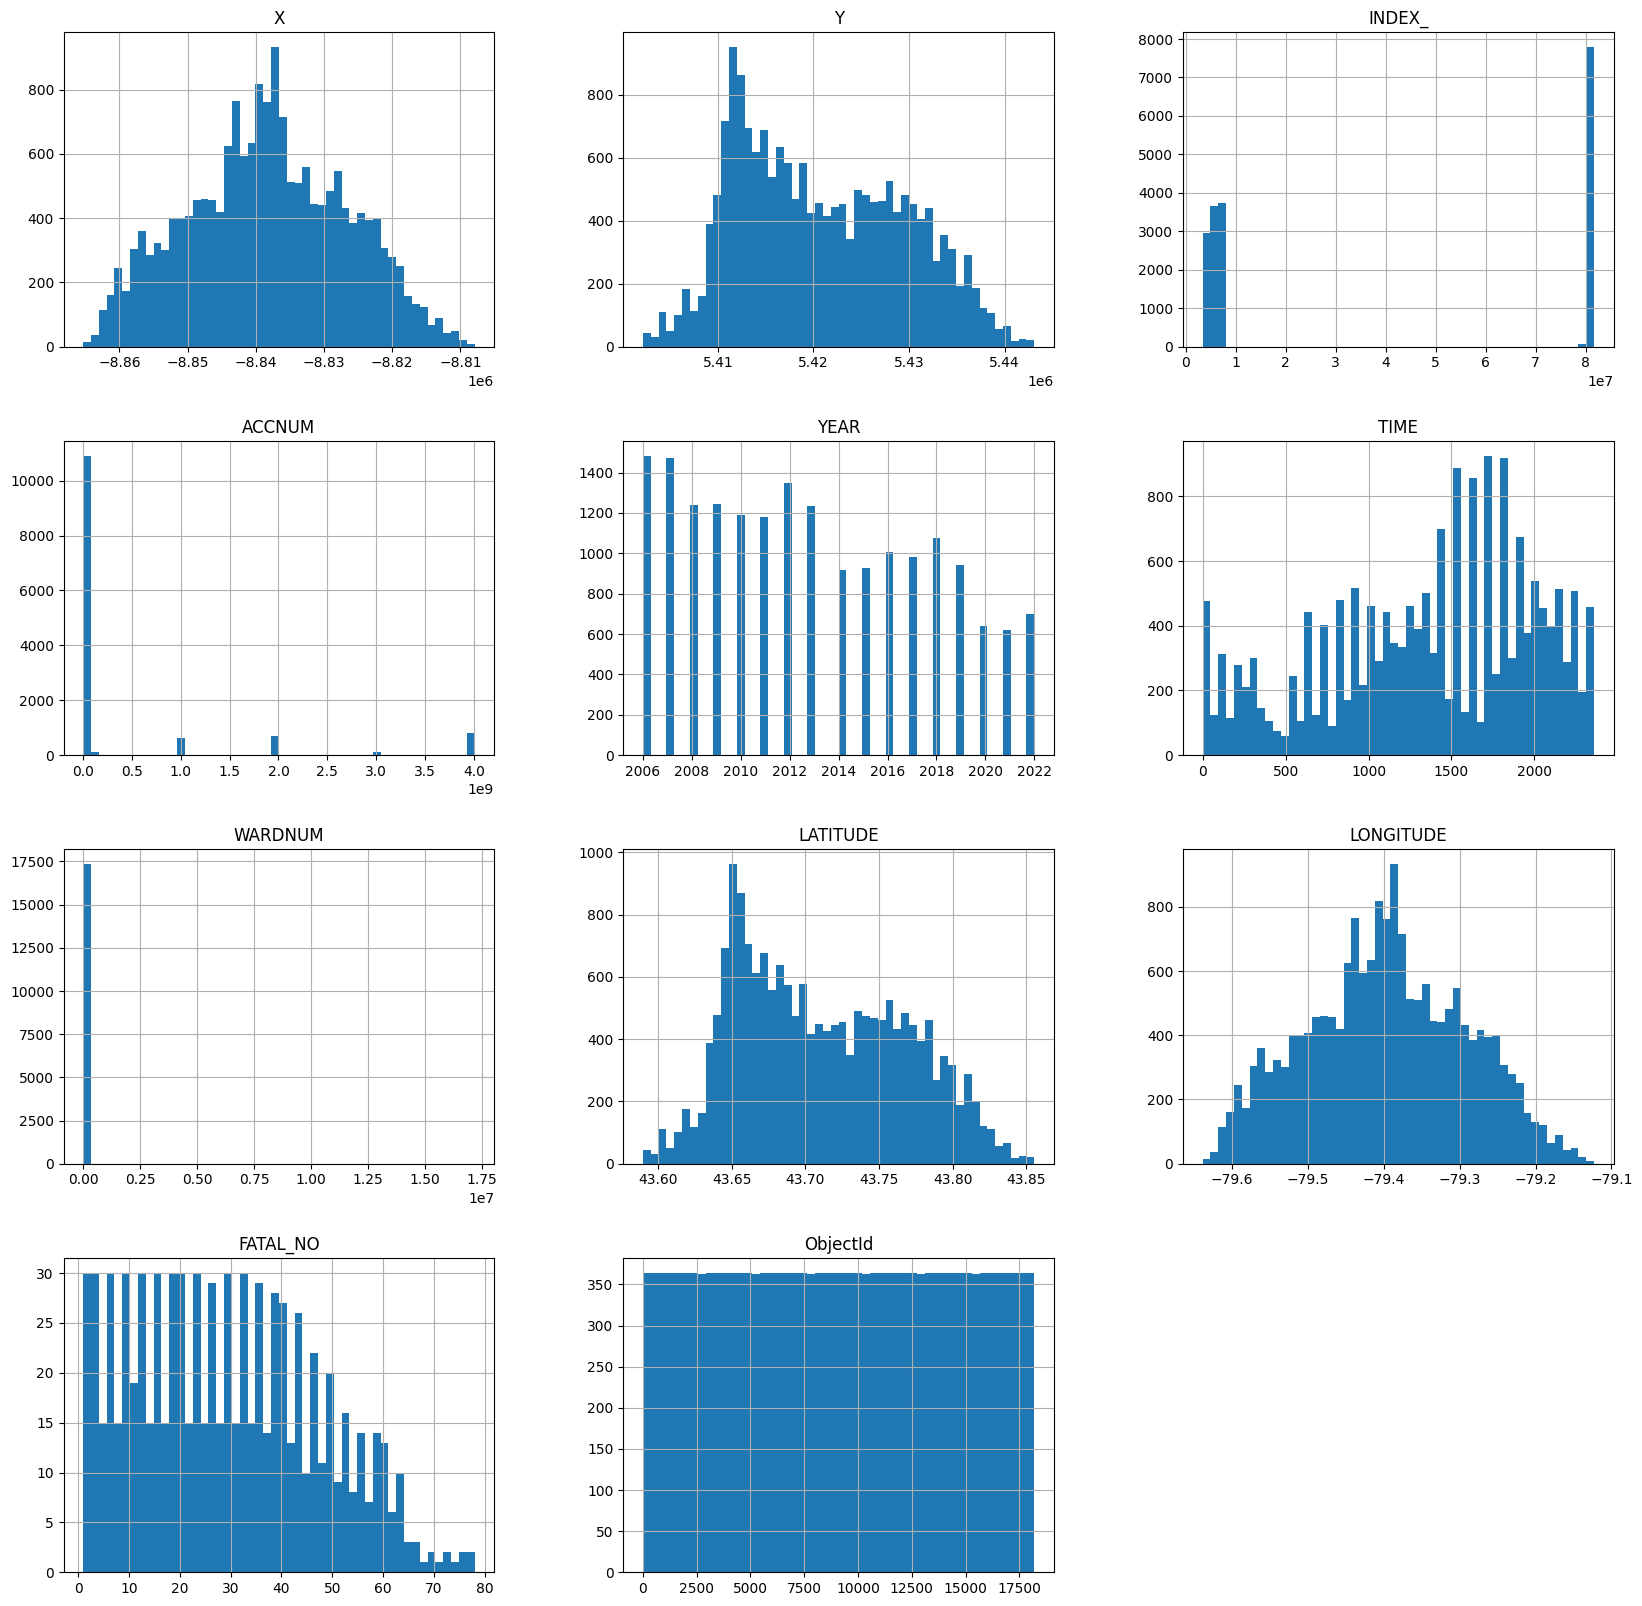

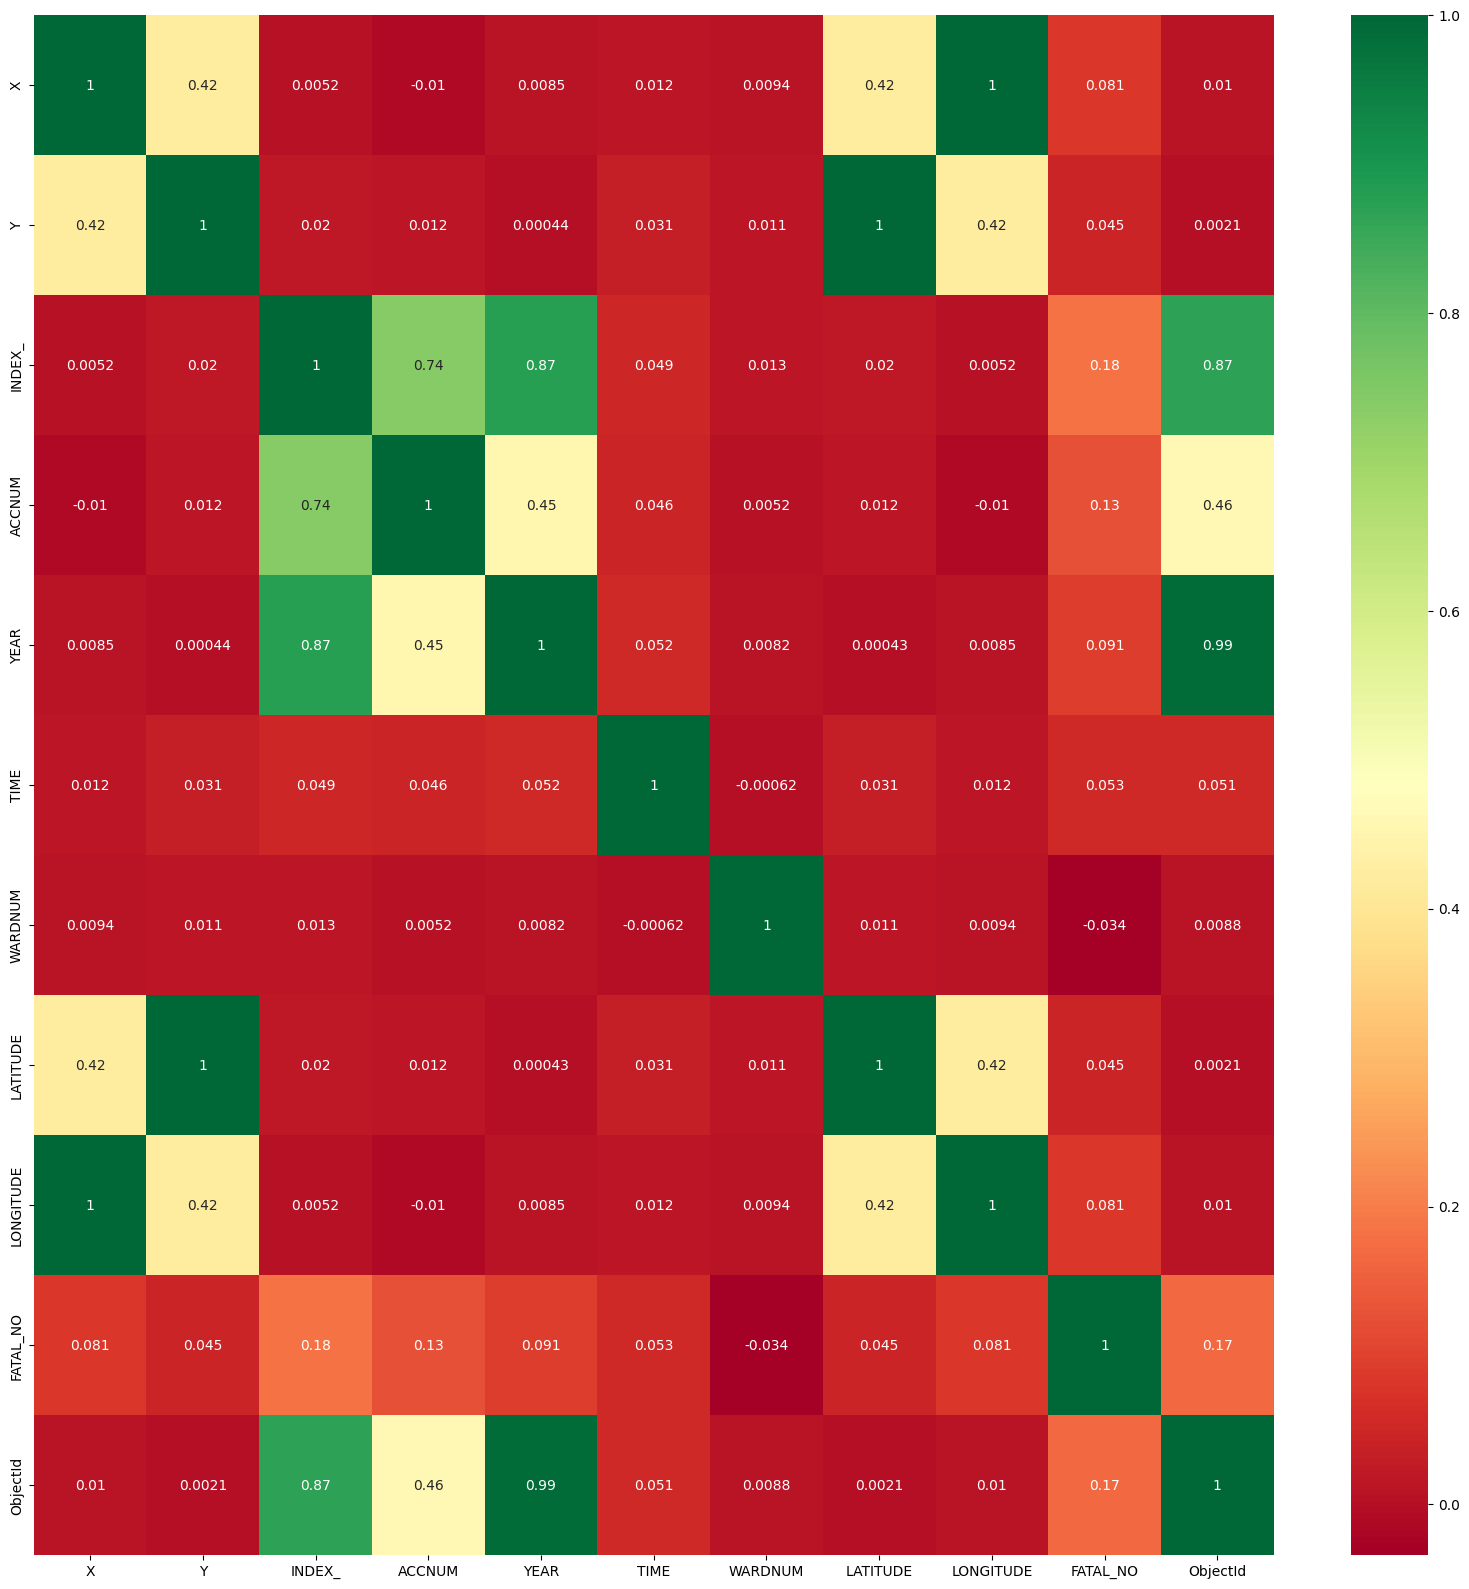

In [79]:
# Plot histogram
df.hist(bins=50, figsize=(20, 20))
plt.show()

# Plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn')
plt.show()


In [80]:
# Double check if we need to use these columns to train the model based on the requirement
# yes and no columns
bool_cols = [df.columns[col] for col in range(38, 51)]
bool_cols


['PEDESTRIAN',
 'CYCLIST',
 'AUTOMOBILE',
 'MOTORCYCLE',
 'TRUCK',
 'TRSN_CITY_VEH',
 'EMERG_VEH',
 'PASSENGER',
 'SPEEDING',
 'AG_DRIV',
 'REDLIGHT',
 'ALCOHOL',
 'DISABILITY']

In [81]:
# Fill missing values with 'No' in boolean columns
df[bool_cols] = df[bool_cols].fillna('No')
df[bool_cols]

,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
0,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No
1,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No
2,No,No,Yes,Yes,No,No,No,No,No,Yes,Yes,No,No
3,No,No,Yes,No,No,No,No,Yes,Yes,Yes,No,Yes,No
4,No,No,Yes,Yes,No,No,No,No,No,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18189,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No
18190,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No
18191,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No
18192,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No


In [82]:
# Drop columns having more than 80% missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
columns_to_drop = missing_percentages[missing_percentages > 80].index
df = df.drop(columns=columns_to_drop)

In [83]:
# From correlation matrix, we can see that 'X' and 'LONGITUDE', 'Y' and 'LATITUDE' are highly correlated.
# So, we will drop x and y columns
columns_to_drop = ['X', 'Y']
df = df.drop(columns=columns_to_drop)

In [84]:
# Drop columns which may not be useful for analysis
# 'ObjectId' and 'INDEX_' are unique identifiers and not useful for analysis
# 'ACCNUM' is also unique identifier and not useful for analysis
# initial direction of vehicle 'INITDIR' is not useful for analysis
# we dont need street names 'STREET1' and 'STREET2' for analysis beacasue we have 'neighbourhood' column
# 'DISTRICT' and 'WARDNUM' are not useful for analysis beacuse we have 'neighbourhood' column
# unique identifier 'DIVISION' is not useful for analysis
# 'HOOD_158' and 'HOOD_140' are not useful for analysis because they are unique identifiers
# 'INJURY' is not useful for analysis because it is the target variable
columns_to_drop = ['ObjectId', 'INDEX_', 'ACCNUM', 'INITDIR', 'STREET1',
                   'STREET2', 'DISTRICT', 'WARDNUM', 'DIVISION', 'HOOD_158', 'HOOD_140', 'INJURY']
# 'INJURY' feature which might be dropped depends on the accuracy score of model
df = df.drop(columns=columns_to_drop)

In [85]:
# In 'NEIGHBOURHOOD_140', the values contain number inside brackets. We can remove the number inside brackets.
df['NEIGHBOURHOOD_140'] = df['NEIGHBOURHOOD_140'].str.replace(r"\(.*\)", "")

In [86]:
# Convert 'property' to 'non fatal'
df['ACCLASS'] = df['ACCLASS'].str.replace(
    "Property Damage Only", "Non-Fatal Injury")

In [87]:
# columns <3% missing values from the categorical, drop it

print(df.shape)

(18194, 35)


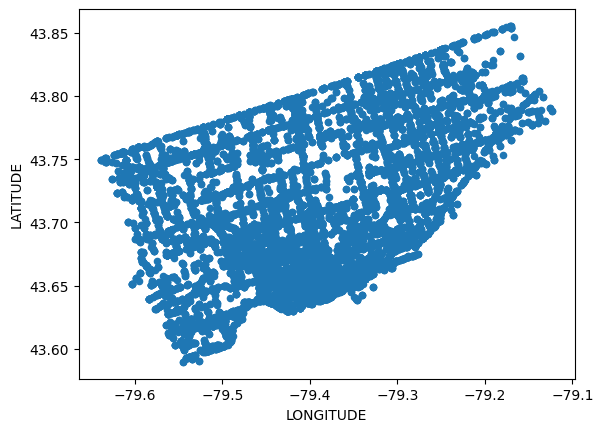

In [88]:
df.plot.scatter(x='LONGITUDE',y='LATITUDE')
plt.show()

In [89]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['DATE', 'ROAD_CLASS', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140'],
      dtype='object')

<Axes: xlabel='ROAD_CLASS'>

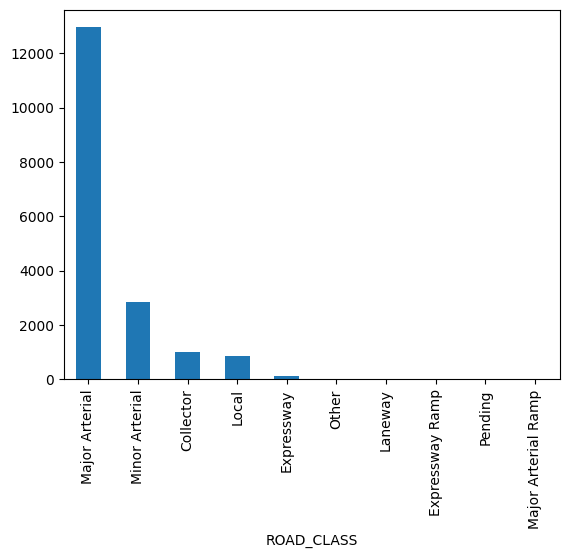

In [90]:
df['ROAD_CLASS'].value_counts().plot.bar()

In [91]:
print(df.columns)


Index(['YEAR', 'DATE', 'TIME', 'ROAD_CLASS', 'LATITUDE', 'LONGITUDE',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'VEHTYPE', 'MANOEUVER',
       'DRIVACT', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140'],
      dtype='object')


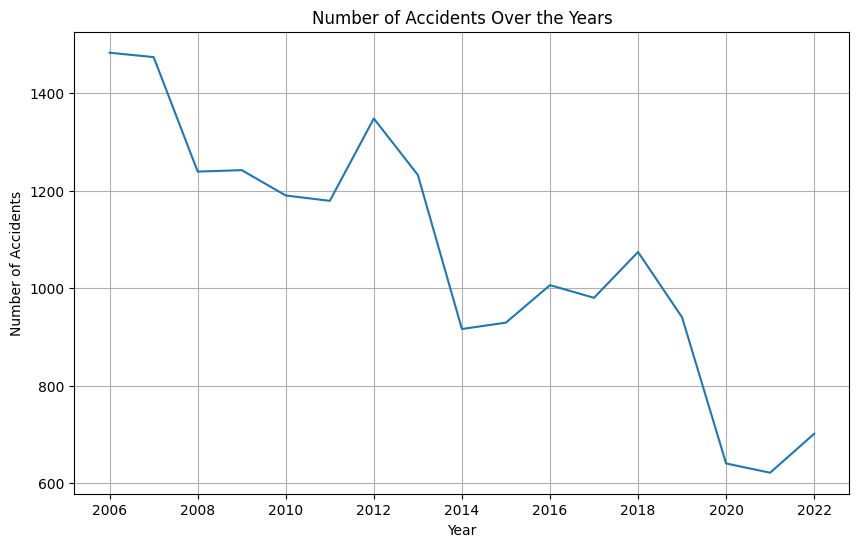

In [92]:
# Plotting accidents over the years
df['YEAR'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Number of Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


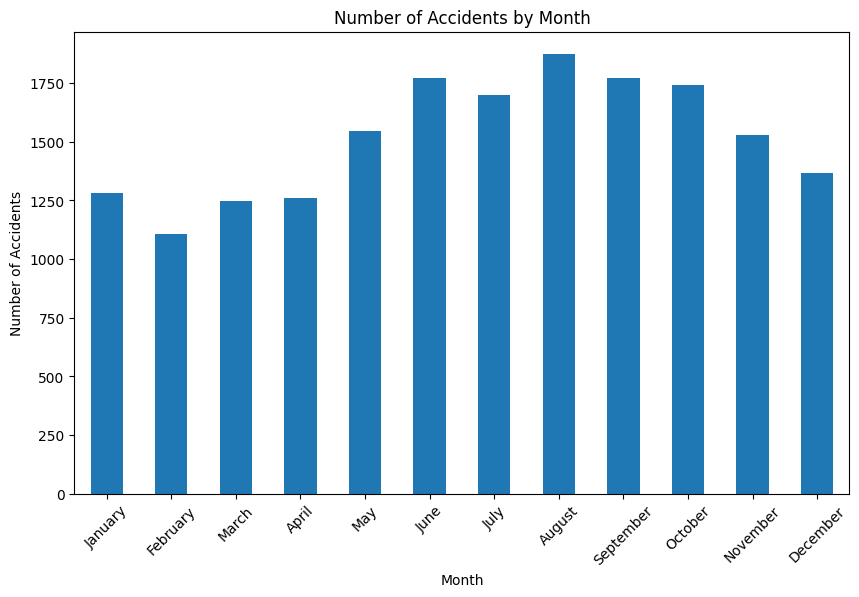

In [93]:
import pandas as pd

# Ensuring the 'DATE' column is in datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Extracting 'MONTH', 'DAY', and 'WEEKDAY' from the 'DATE' column
df['WEEKDAY'] = df['DATE'].dt.day_name()  # Extracting day of the week
df['DAY'] = df['DATE'].dt.day  # Extracting day
df['MONTH'] = df['DATE'].dt.month_name()  # Extracting month

df['MONTH'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).plot(kind='bar', figsize=(10, 6))
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


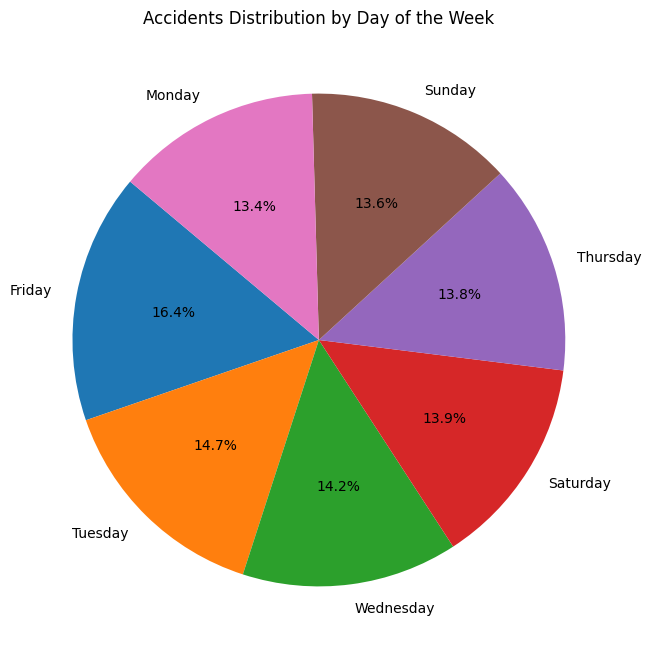

In [94]:
# Counting the number of accidents by day of the week
accidents_by_weekday = df['WEEKDAY'].value_counts()

# Plotting pie chart for accidents by day of the week
plt.figure(figsize=(8, 8))
accidents_by_weekday.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Accidents Distribution by Day of the Week')
plt.ylabel('')  # Hiding the y-label as it's not needed for pie charts
plt.show()


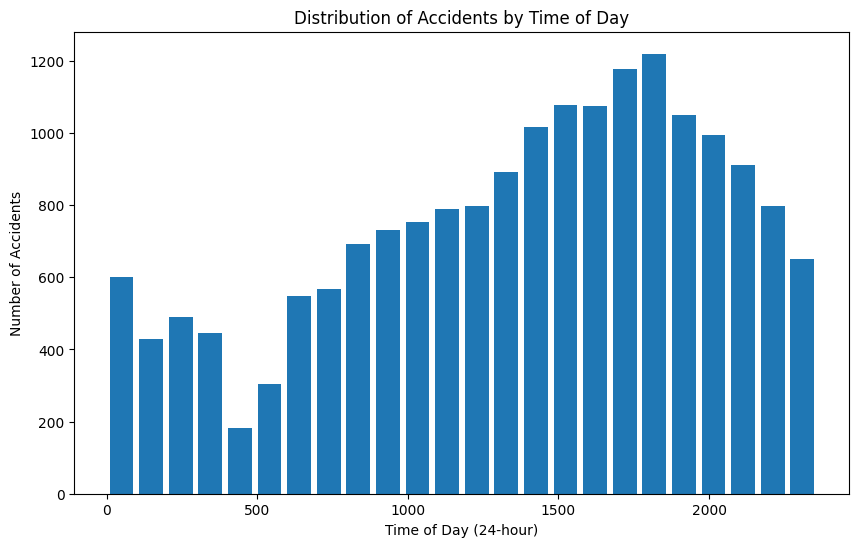

In [95]:
df['TIME'].plot(kind='hist', bins=24, rwidth=0.8, figsize=(10, 6))
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Time of Day (24-hour)')
plt.ylabel('Number of Accidents')
plt.show()


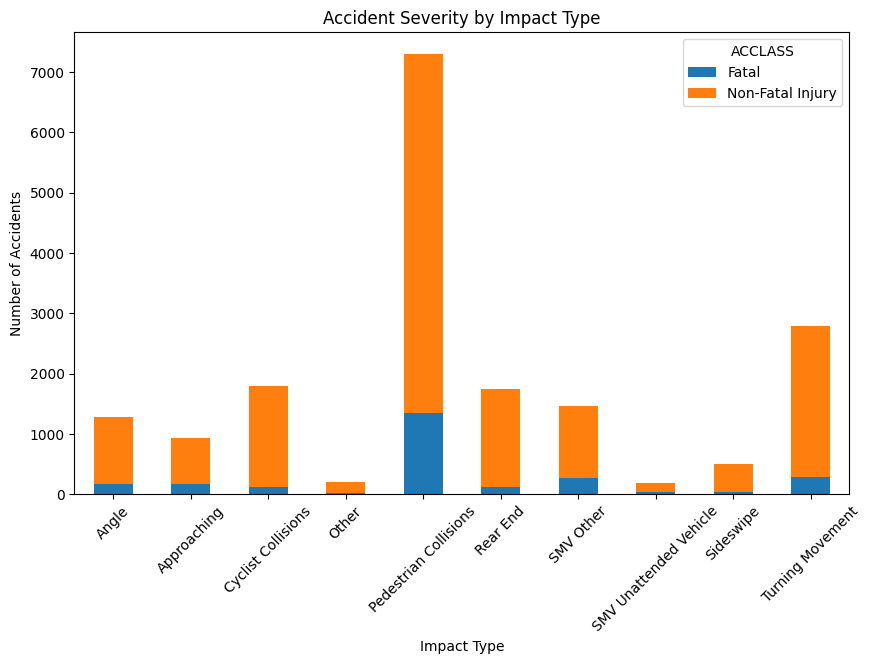

In [96]:
df.groupby('IMPACTYPE')['ACCLASS'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Accident Severity by Impact Type')
plt.xlabel('Impact Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


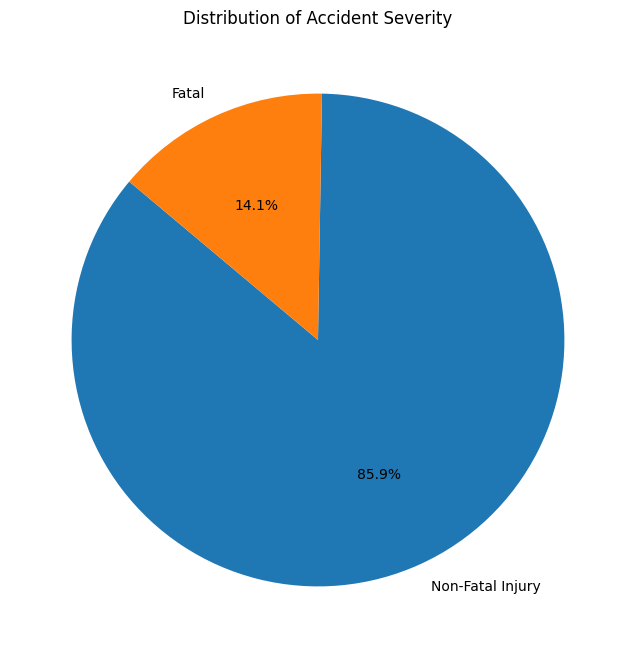

In [97]:
# Assuming 'ACCLASS' column exists and contains accident severity classifications
severity_counts = df['ACCLASS'].value_counts()

# Plotting pie chart for accident severity distribution
plt.figure(figsize=(8, 8))
severity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Accident Severity')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()
